## Importing the necessary libraries

In [58]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Reading the data from the file

#### The comments in the file are taken from various facebook posts' comment section. All these comments are of Telugu language but they were written using English alphabet and with some special characters.

In [59]:
data = pd.read_csv("facebook01.csv", encoding = 'latin1')

In [60]:
data.head()

,CONTENT,CLASS
0,Sarvam Venky sarvadu ki wishes chepu ma andhar...,0
1,To be frank Naresh Sr. Garu kuda Amrutham la B...,0
2,Nadi kuda ivala b'day,0
3,"Kakapothe Gundu garu, naresh gari combination ...",0
4,naresh garu set avvaledu...and may b script lo...,0


## Creating inputs and output

In [61]:
inputs = data['CONTENT']
target = data['CLASS']

In [76]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42, stratify = target)

In [77]:
y_train.value_counts(normalize = True)

0    0.518987
1    0.481013
Name: CLASS, dtype: float64

In [78]:
y_test.value_counts(normalize = True)

0    0.55
1    0.45
Name: CLASS, dtype: float64

## Tokenizing the comments

In [79]:
vectorizer = CountVectorizer()

In [80]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [81]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
x_train_transf.shape

(79, 375)

In [83]:
x_test_transf.shape

(20, 375)

## Classification

In [84]:
clf = MultinomialNB()
clf.fit(x_train_transf, y_train)
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [85]:
y_test_pred = clf.predict(x_test_transf)

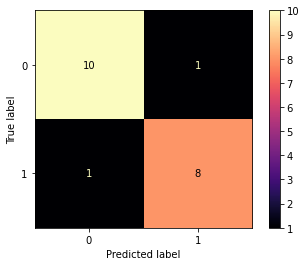

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels = clf.classes_, cmap = 'magma');

In [87]:
print(classification_report(y_test, y_test_pred, target_names = ['inoffensive','offensive']))

              precision    recall  f1-score   support

 inoffensive       0.91      0.91      0.91        11
   offensive       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



## Making Predictions

In [88]:
predict_data = vectorizer.transform(['pora yedava','chala bagundhi'])

In [89]:
clf.predict(predict_data)

array([1, 0], dtype=int64)

### Though the Telugu comments were written using English alphabet, we can filter atleast some hatred comments with this.